In [1]:
import sys
sys.path.append('/home/zhangjianquan/anaconda3/lib/python3.7/site-packages/')


In [2]:
import pandas as pd 
import numpy as np 
#import type_of_dataset
import sys
import joblib
import shap
import matplotlib.pyplot as plt

from analysis import globalSurrogate,shap_compute,residuals_plot
from handpreprocessing import handpreprocessing
from fucset import data_duplicate, data_normalization, data_anomaly, data_encoding, data_encoding_2
from missing import missing_value_processing
from train import Model_train
from data_overview import plot_missing,plot_col_unique,plot_numhist,plot_strbar,plot_correlation

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
from hand.predict_hand import predict_hand
from qualified.predict_qualified import predict_qualified
from encoding.predict_encoding import predict_encoding
from feature.predict_feature import predict_feature

In [4]:
data_hand, cols = predict_hand(input_path='../data/raw/used_house_data_test.csv', 
             output_path='../data/intermediate/used_house_data_test_intermediate.csv')

In [5]:
data_hand

,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Year_Of_Housing,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,107100261662,浦东,三林,城林雅苑,1室1厅,2018-09-30,218.0,46502.0,235.0,149.0,...,动迁安置房,2018-05-05,普通住宅,非共有,NaN,28.0,1.0,6.0,1.0,1.0
1,107100668755,浦东,源深,盛世年华,3室2厅,2018-09-30,1620.0,107613.0,1680.0,8.0,...,商品房,2018-09-23,普通住宅,共有,NaN,32.0,2.0,2.0,3.0,2.0
2,107100566972,浦东,世博,雪野二村,2室1厅,2018-09-30,368.0,62089.0,380.0,43.0,...,商品房,2018-08-19,普通住宅,非共有,NaN,6.0,1.0,4.0,2.0,1.0
3,107100390003,浦东,周浦,印象春城,2室2厅,2018-09-30,368.0,41242.0,388.0,105.0,...,商品房,2018-06-18,普通住宅,NaN,NaN,18.0,2.0,4.0,2.0,2.0
4,107100382965,浦东,康桥,双秀西园,2室2厅,2018-09-30,289.0,36125.0,310.0,108.0,...,动迁安置房,2018-06-15,普通住宅,共有,NaN,11.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,107002207043,闵行,颛桥,兴银花园,2室1厅,2018-09-28,220.0,33228.0,240.0,354.0,...,商品房,2017-10-10,普通住宅,共有,NaN,6.0,1.0,2.0,2.0,1.0
96,107100485933,闵行,七宝,东方花园三期,3室2厅,2018-09-28,878.0,66516.0,900.0,69.0,...,商品房,2018-07-22,普通住宅,非共有,NaN,18.0,2.0,4.0,3.0,2.0
97,107100544415,闵行,老闵行,万科公园大道,2室2厅,2018-09-28,371.0,47989.0,360.0,48.0,...,商品房,2018-08-12,普通住宅,非共有,NaN,28.0,1.0,2.0,2.0,2.0
98,107100488853,闵行,七宝,万科城花新园,3室2厅,2018-09-28,850.0,65521.0,850.0,68.0,...,商品房,2018-07-23,普通住宅,共有,NaN,11.0,1.0,2.0,3.0,2.0


数据去重开始
去重后数据规格：(100, 35)
数据去重结束
去除了缺失率超过40 % 的特征:
Property_Rights_Time
Year_Of_Housing
数值型数据EM插补开始,总数据量：100
数值型数据EM插补完成，耗时0秒
非数值型数据EM插补开始,总数据量：100
分类变量预编码完成，开始数据插值
分类变量插值与反编码完成，共耗时0秒
异常检测开始


All-NaN slice encountered
All-NaN slice encountered

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

Iteration num: 3
=========异常点作图========


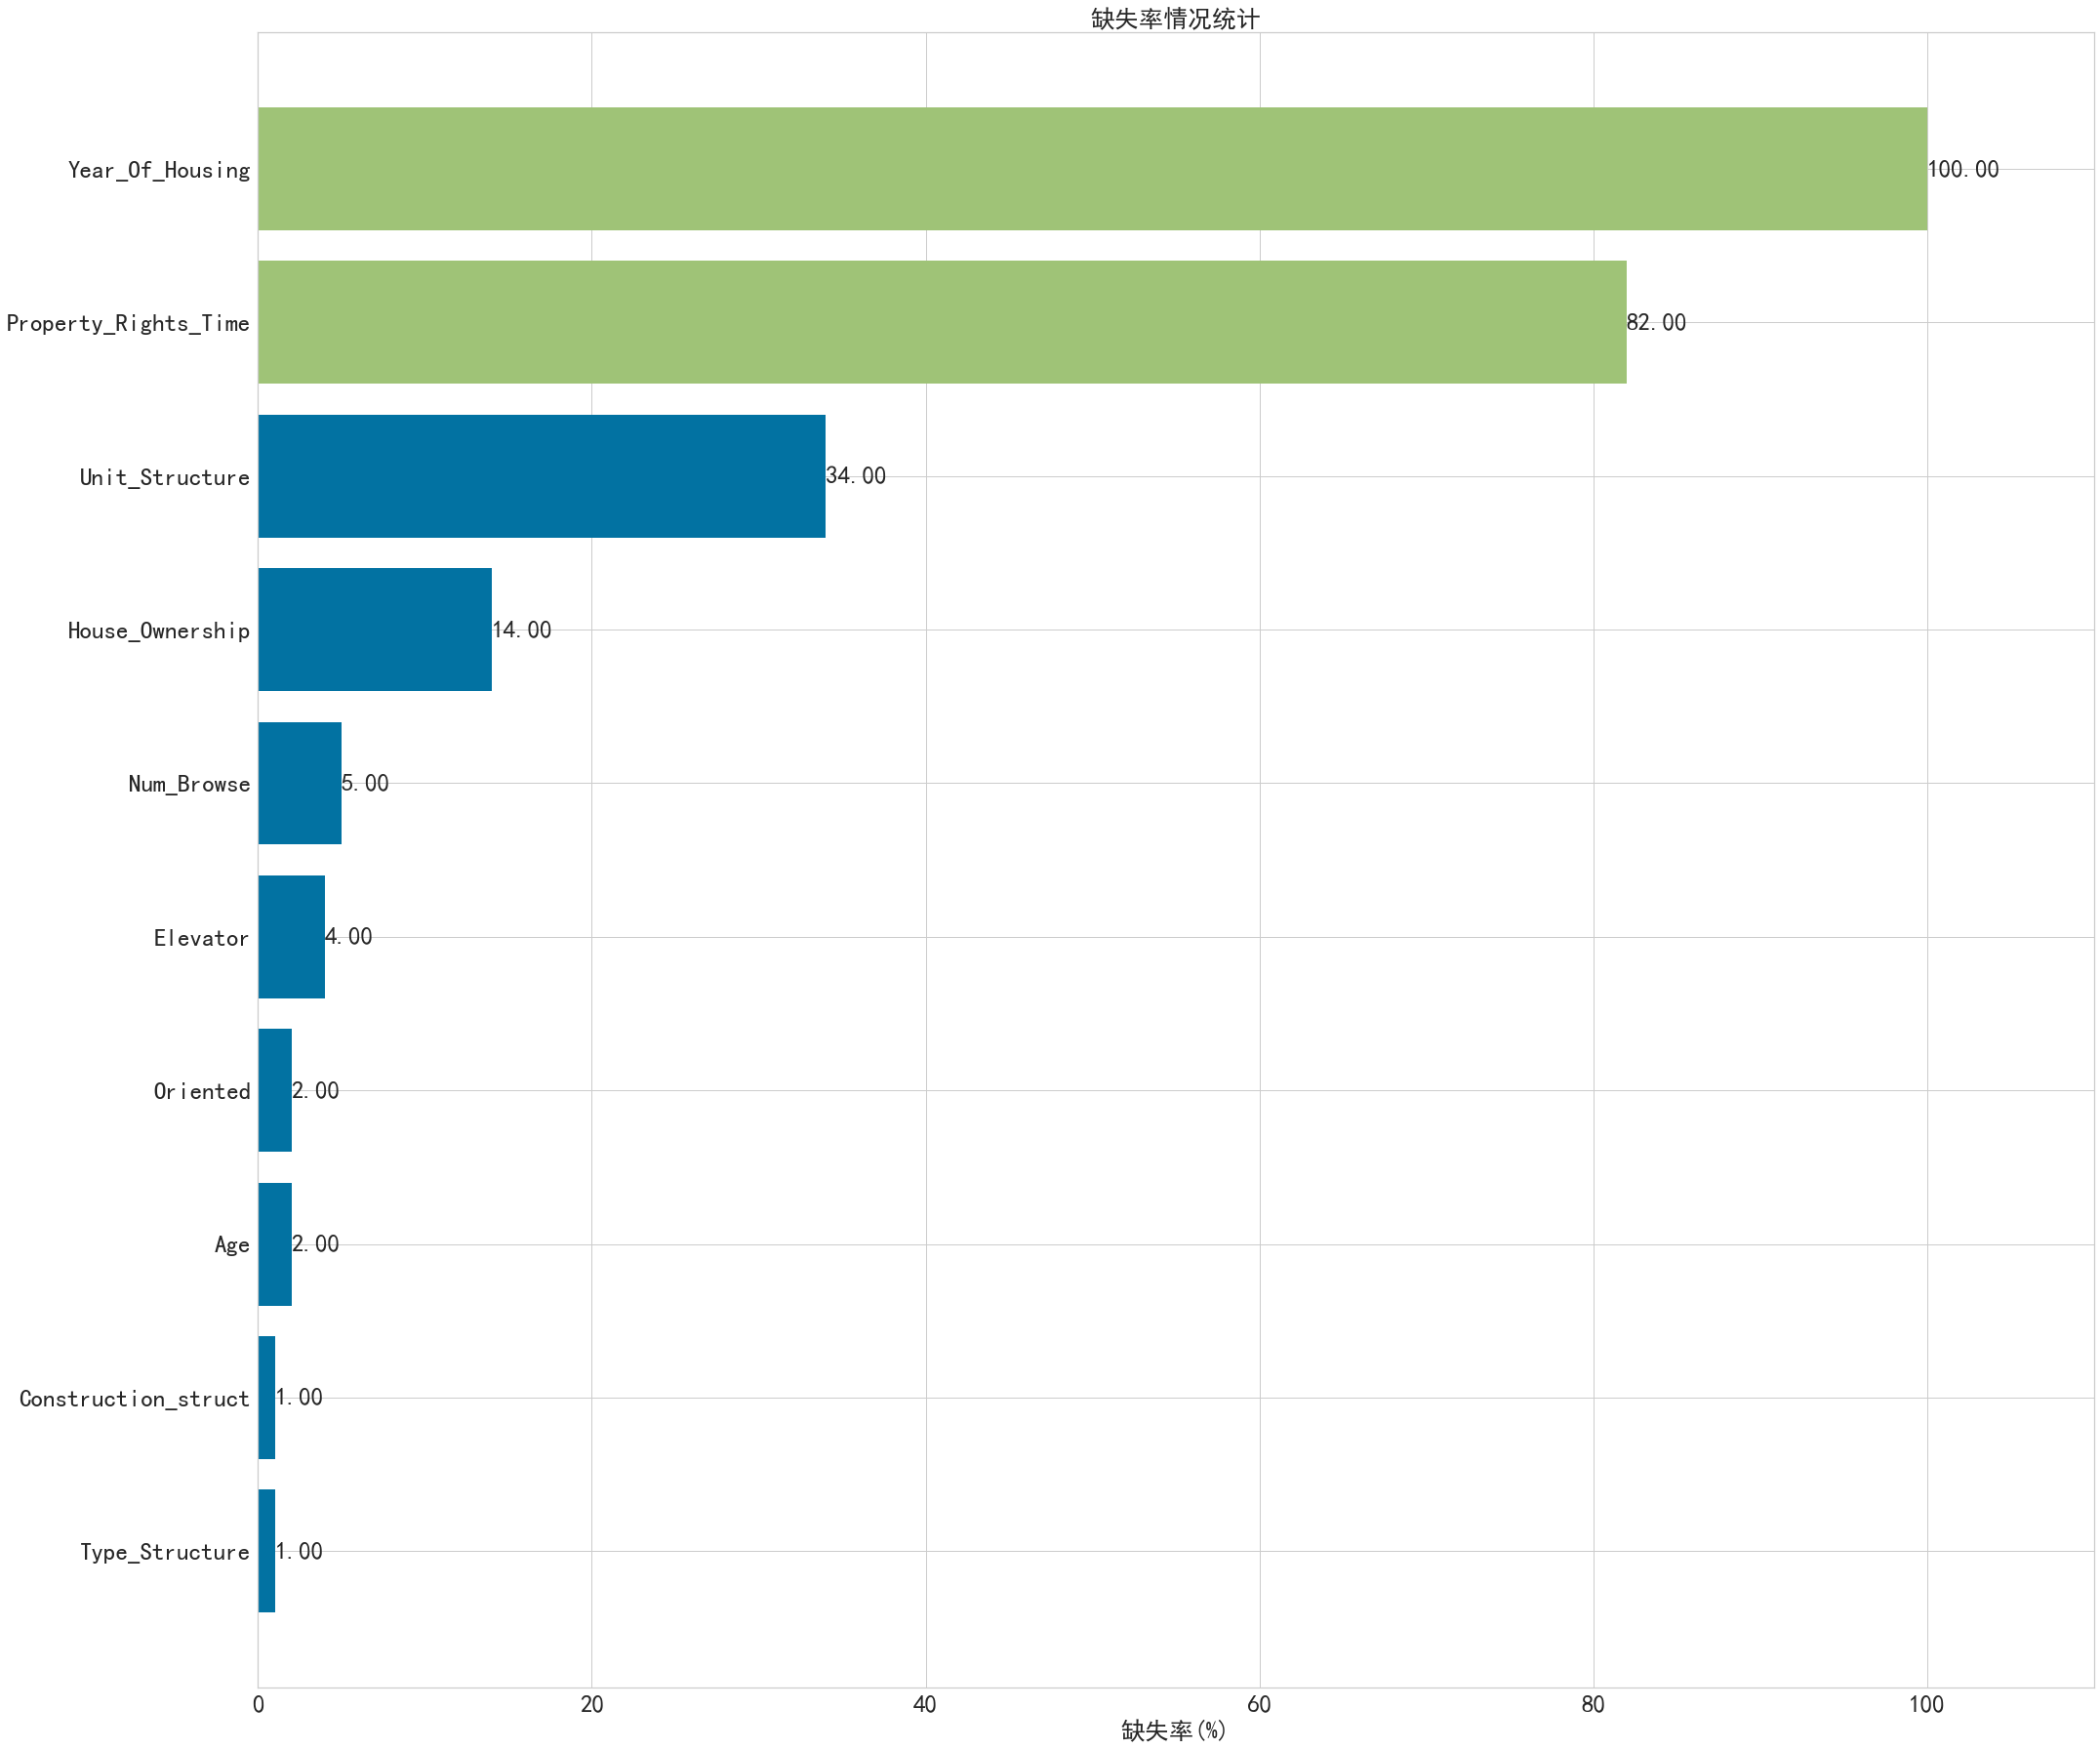

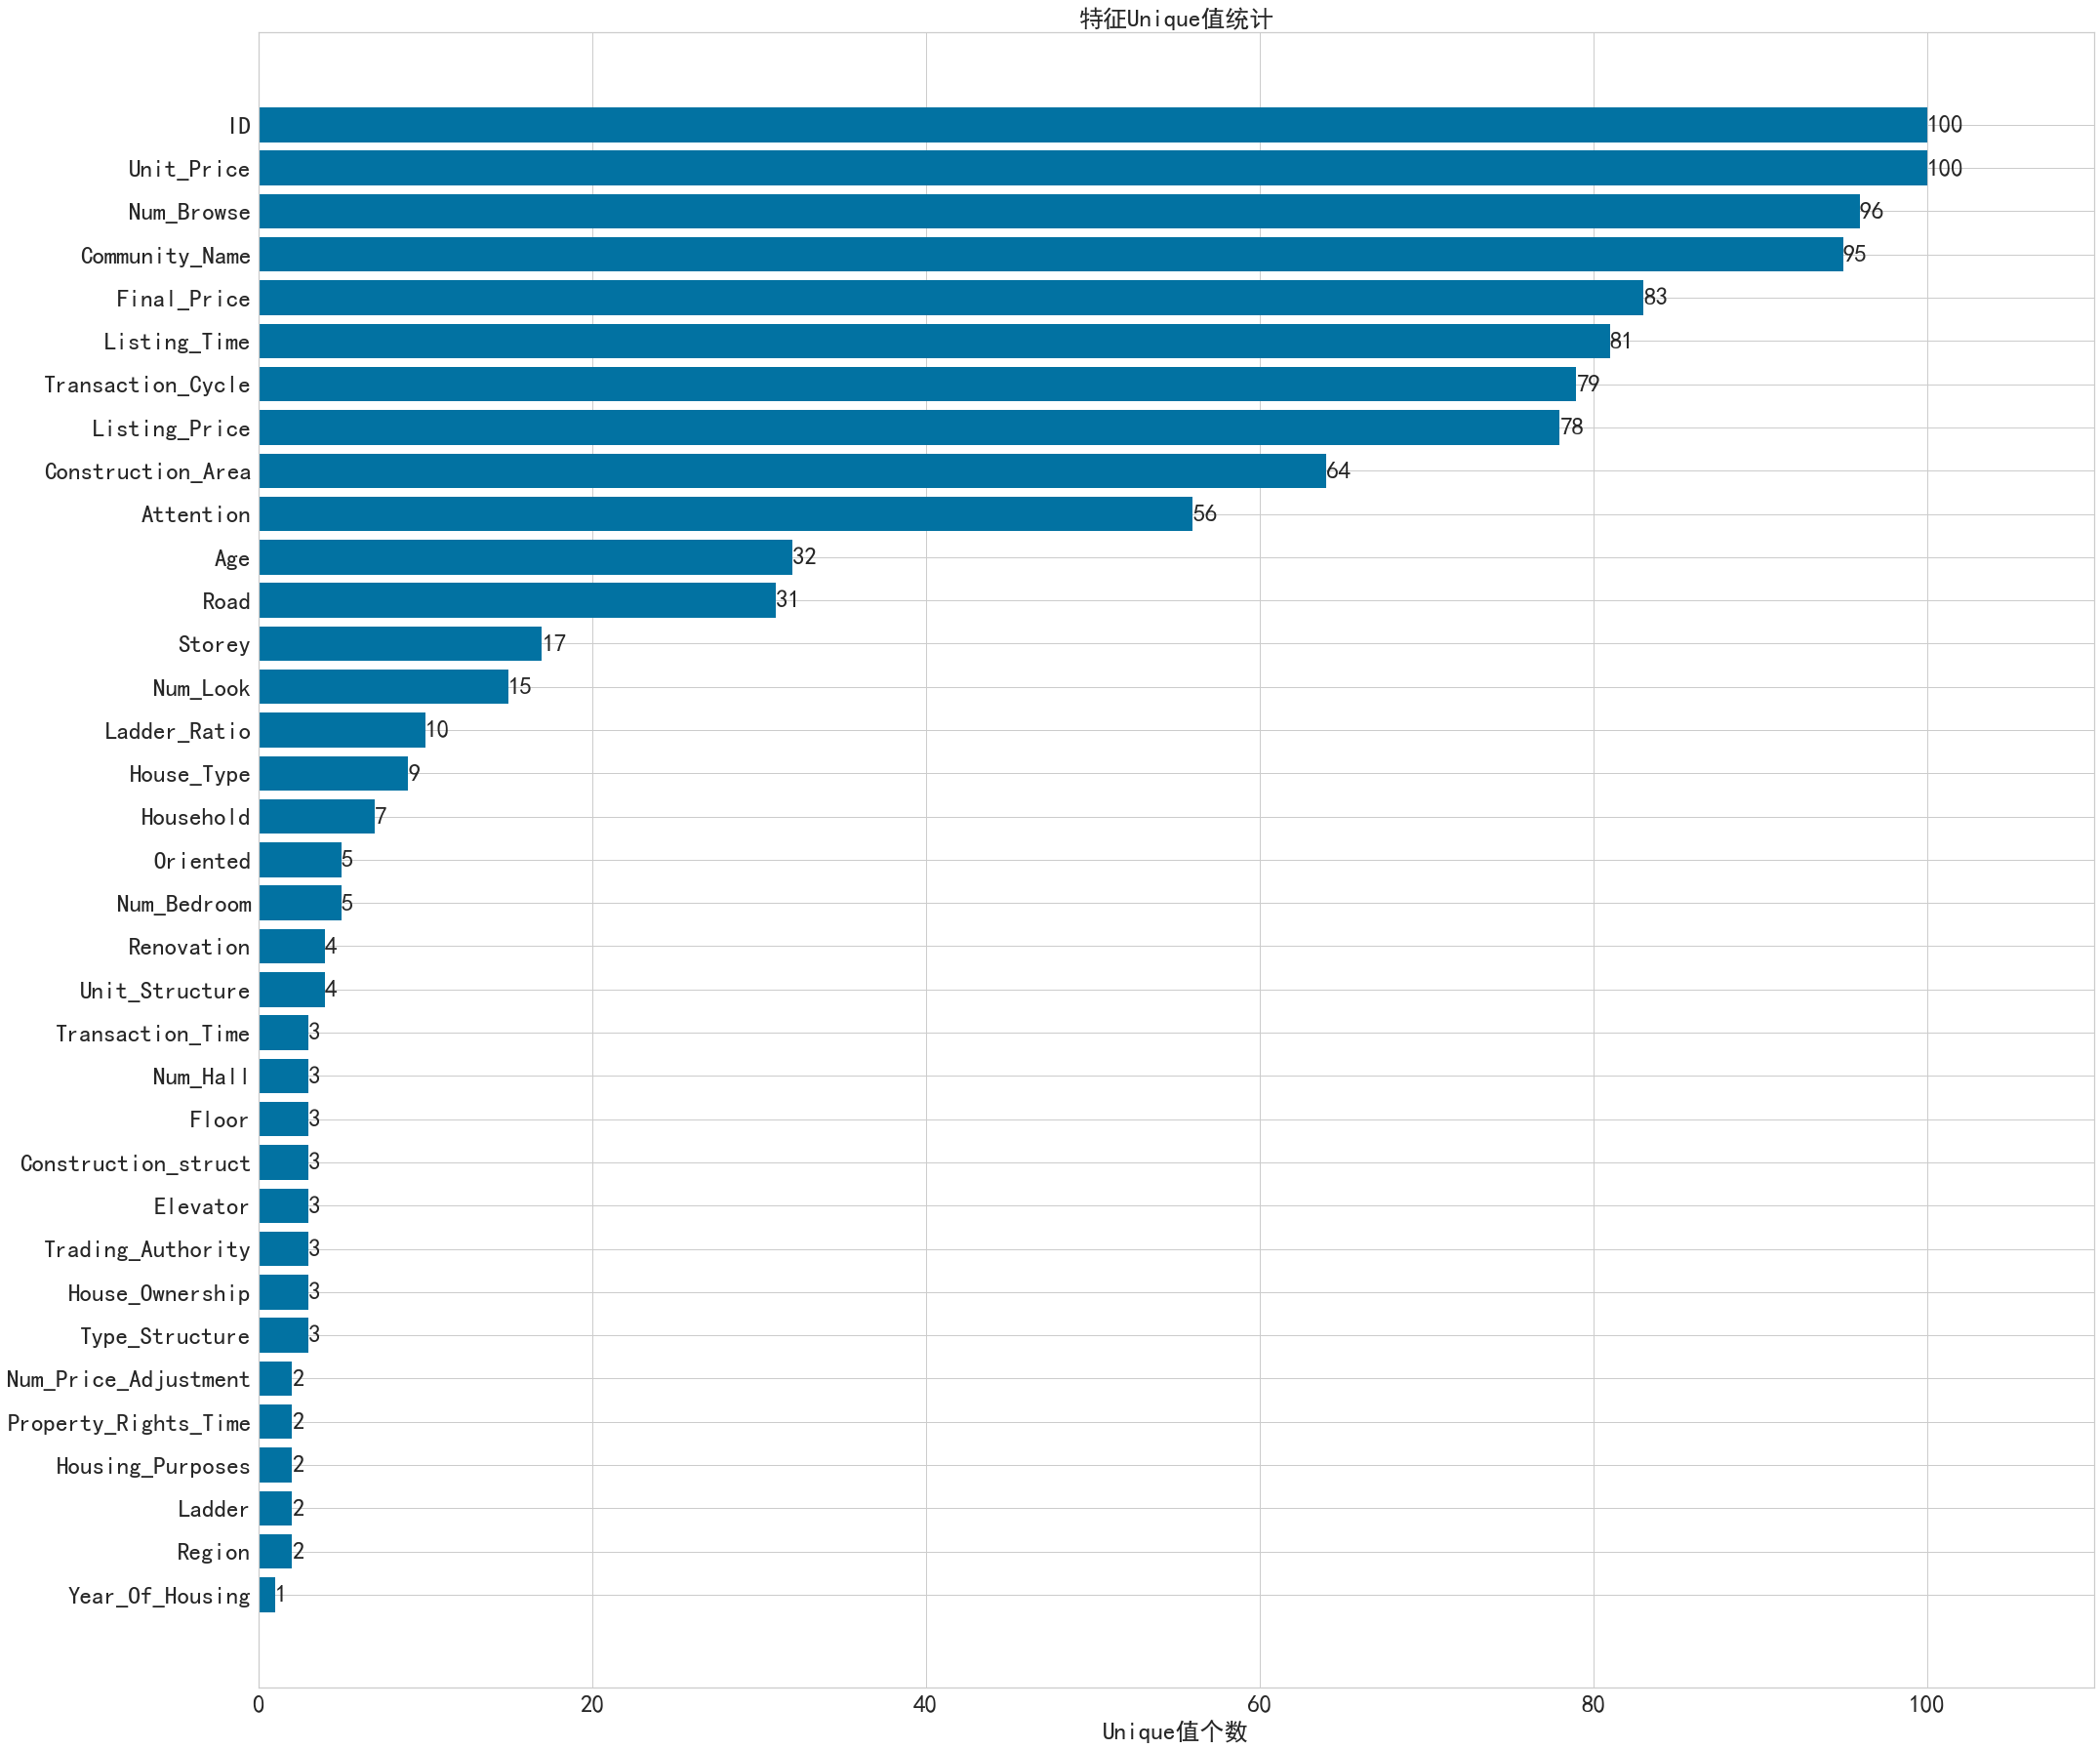

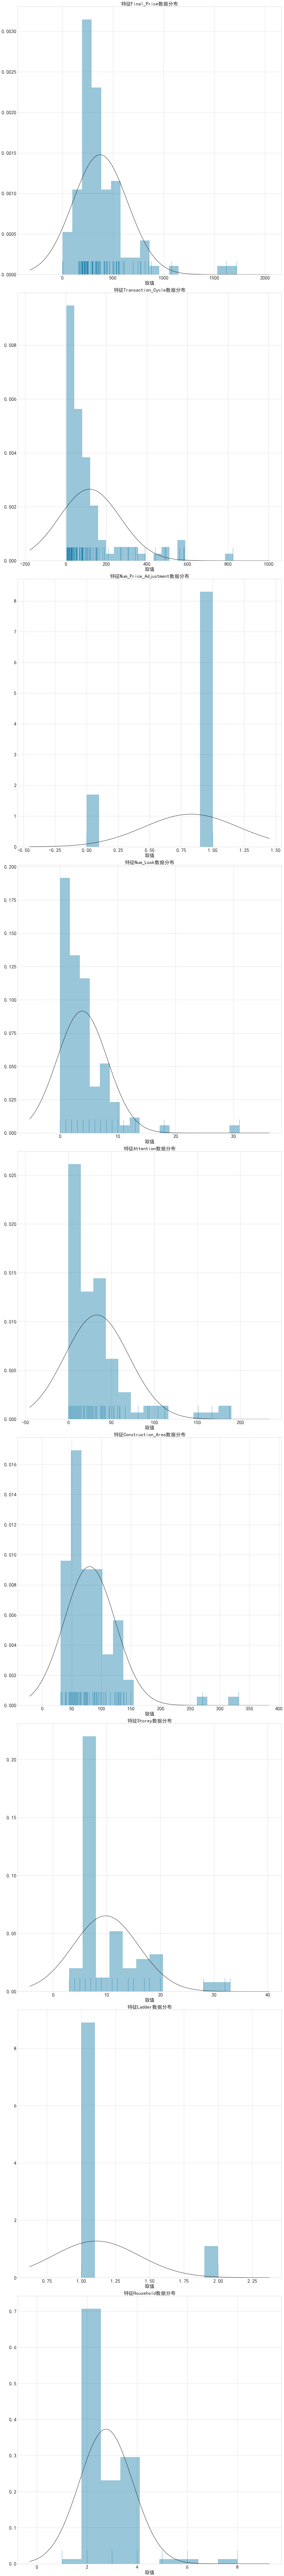

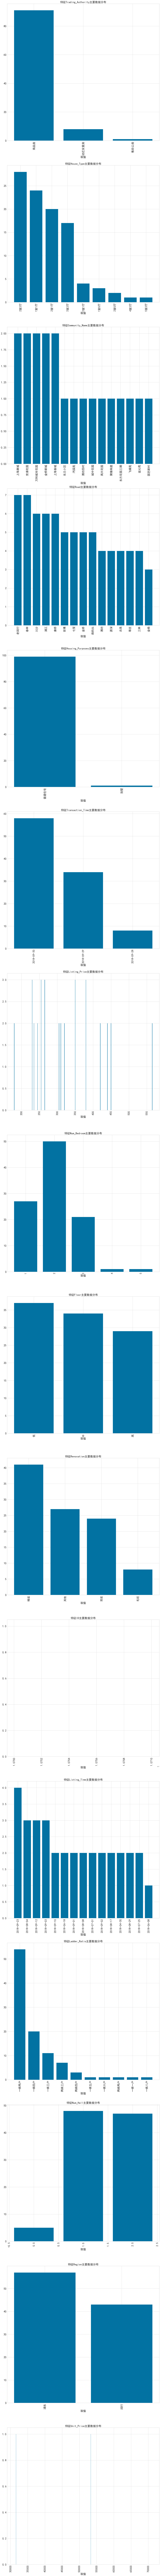

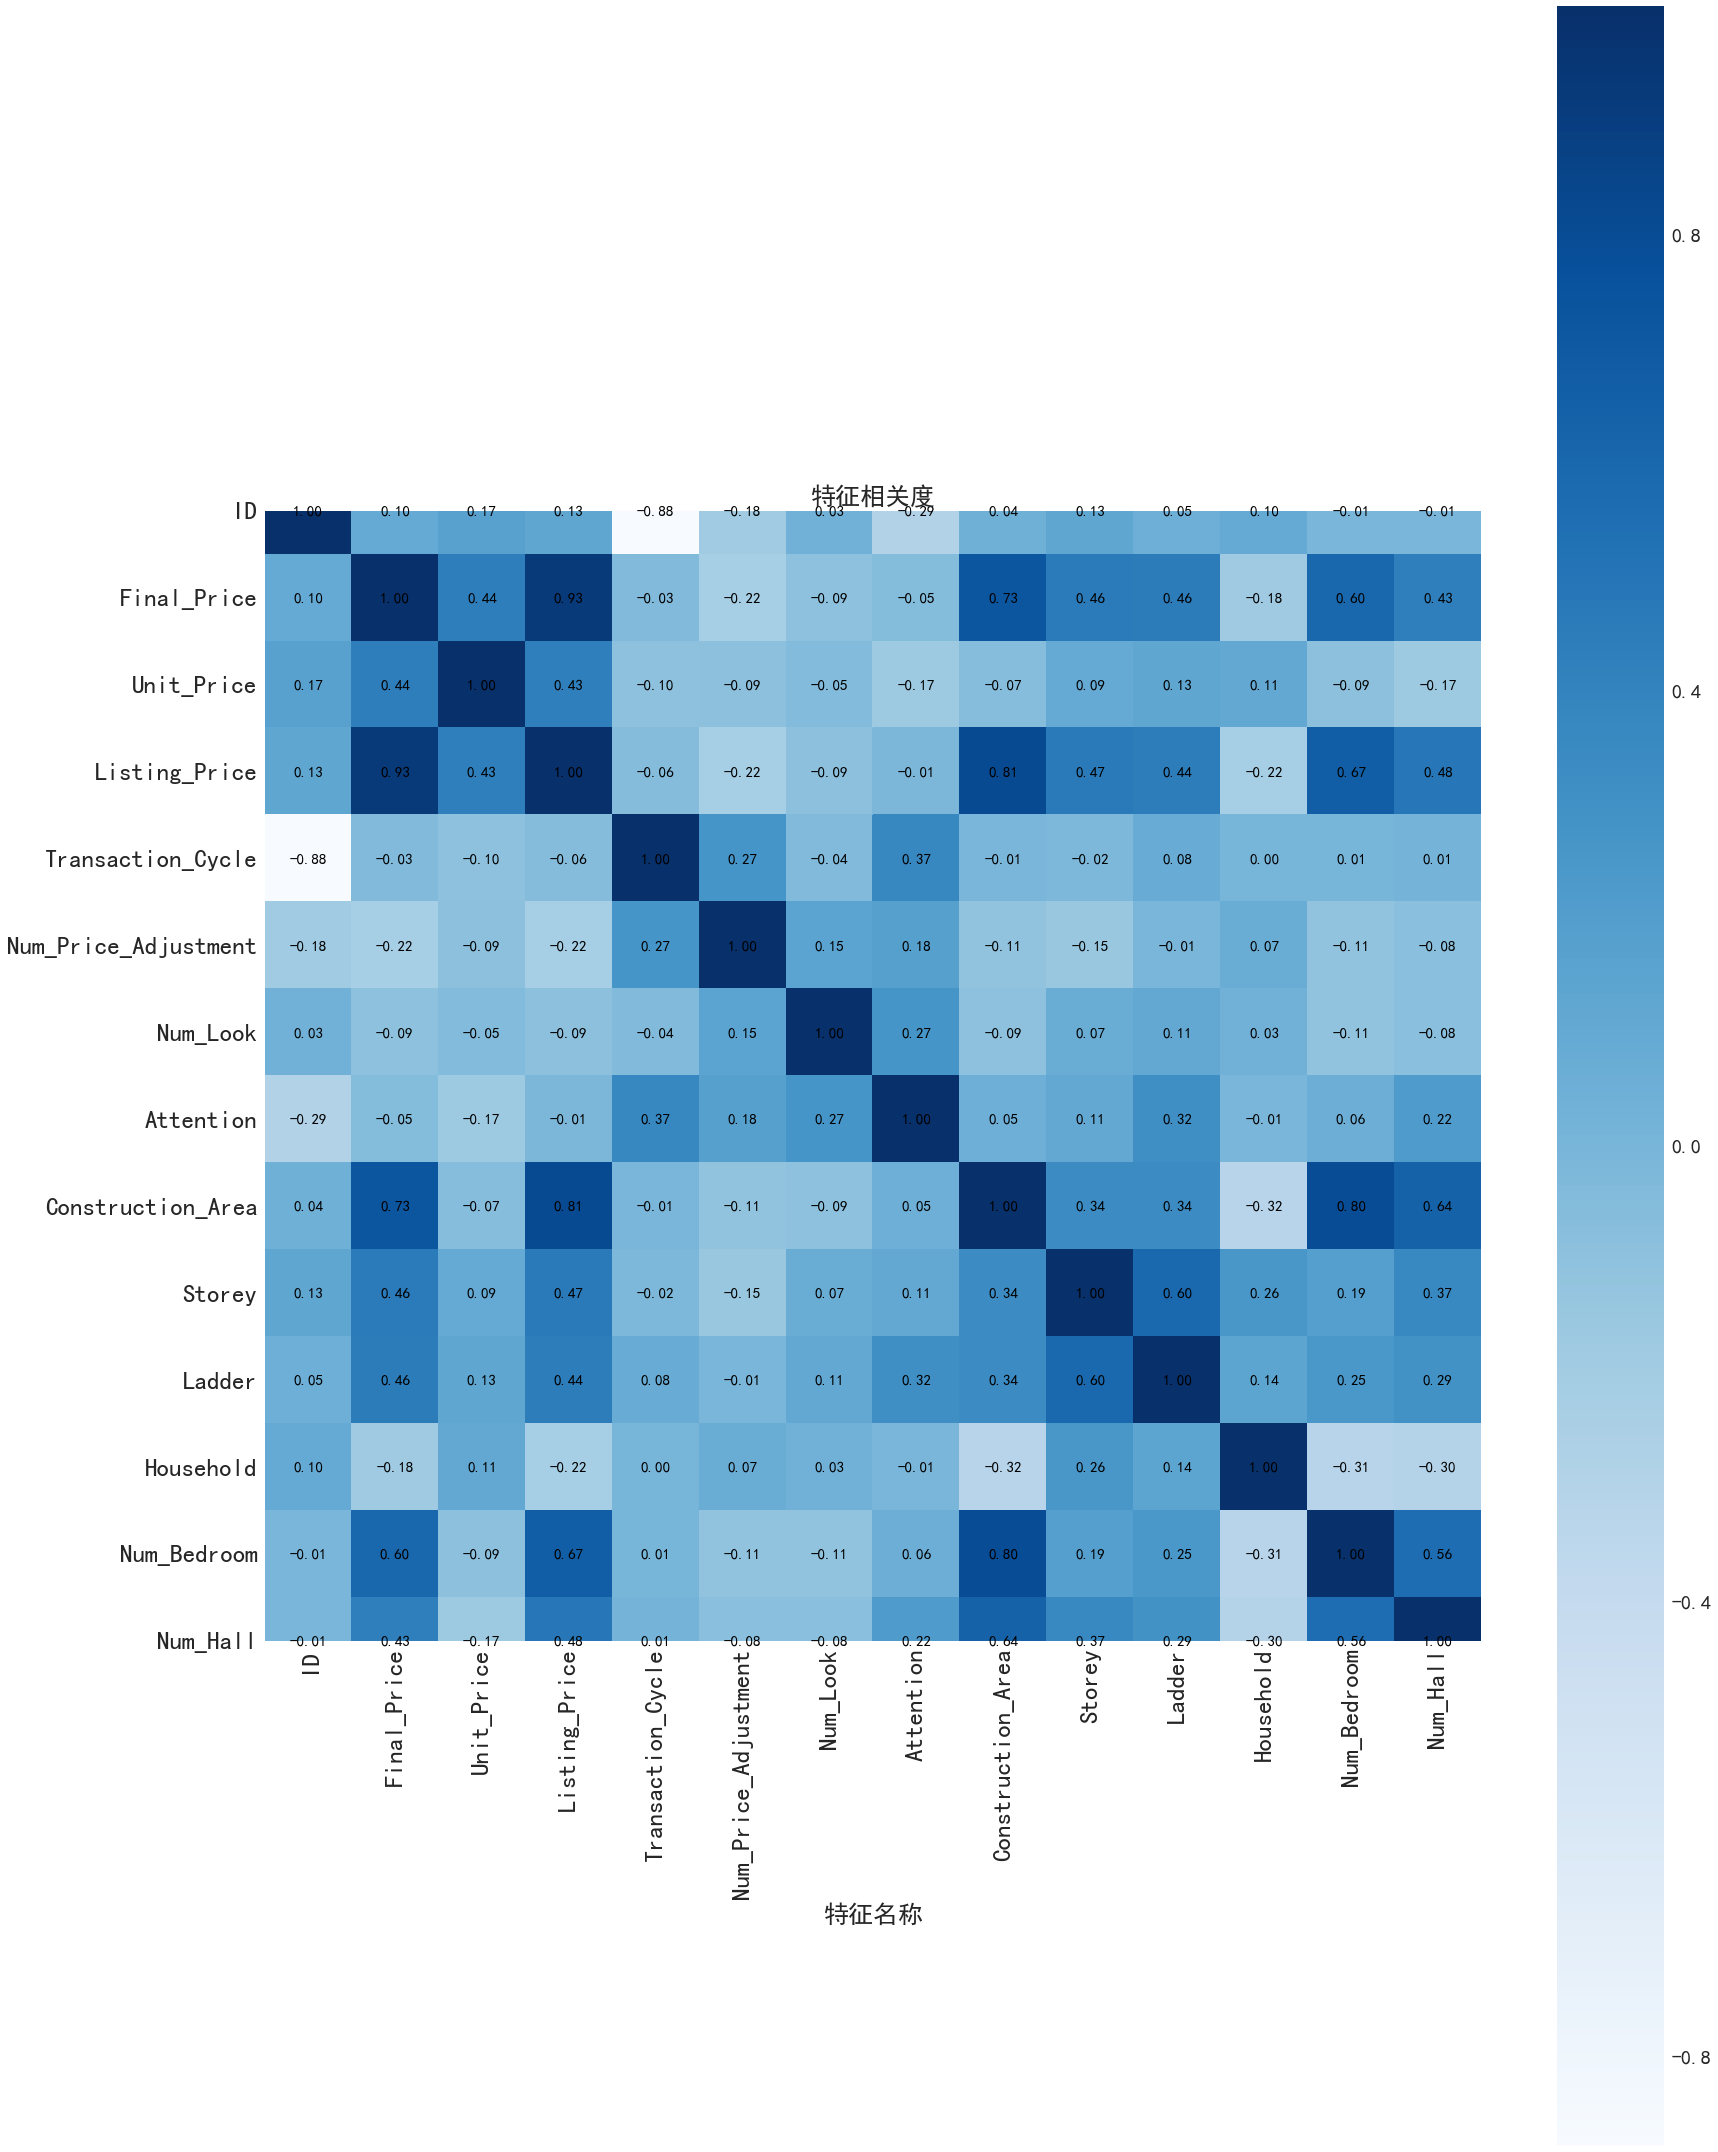

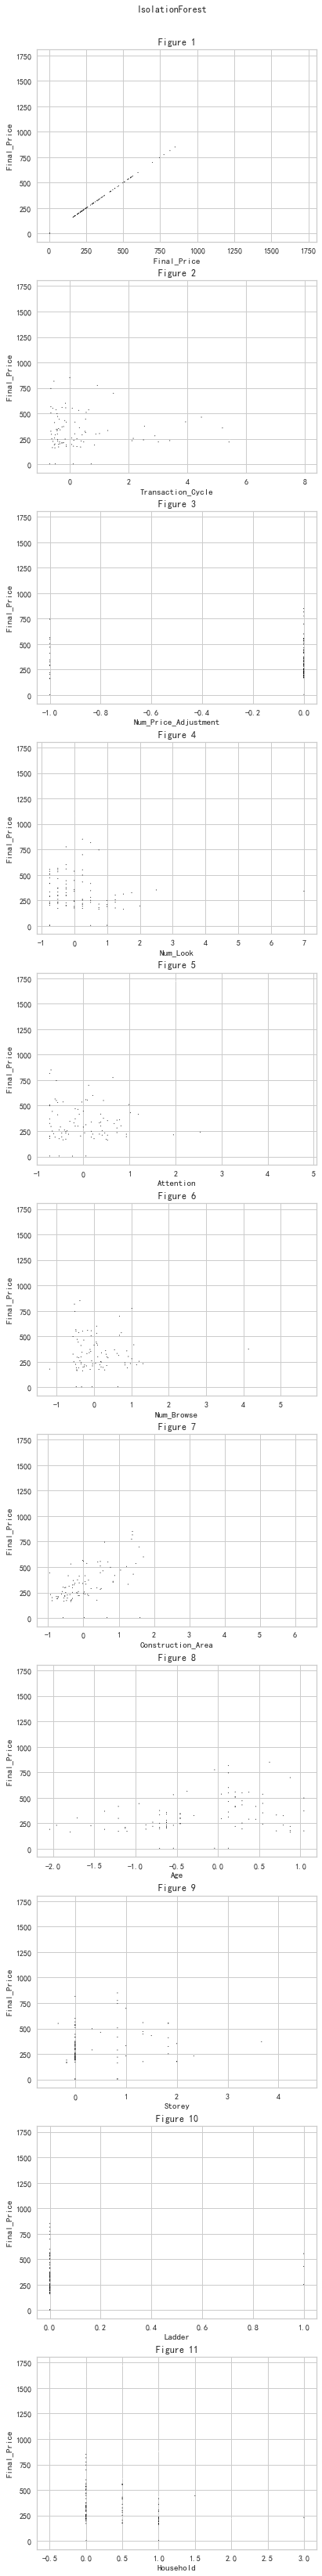

异常检测数： 8
异常检测后数据规格：(100, 12)
耗时：14.9553
异常检测结束


In [6]:
data_qualified = predict_qualified(input_path='../data/intermediate/used_house_data_test_intermediate.csv',
                   output_path='../data/qualified/used_house_data_test_qualified.csv',
                   docs_path='../docs/',
                   name_of_target='Final_Price', cols=cols)

In [7]:
data_qualified

,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Elevator,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,107100261662,浦东,三林,城林雅苑,1室1厅,2018-09-30,218.0,46502,235,0.857895,...,有,动迁安置房,2018-05-05,普通住宅,非共有,3.666667,0.0,2.0,1,1
1,107100566972,浦东,世博,雪野二村,2室1厅,2018-09-30,368.0,62089,380,-0.257895,...,无,商品房,2018-08-19,普通住宅,非共有,0.000000,0.0,1.0,2,1
2,107100382965,浦东,康桥,双秀西园,2室2厅,2018-09-30,289.0,36125,310,0.426316,...,有,动迁安置房,2018-06-15,普通住宅,共有,0.833333,0.0,1.0,2,2
3,107100407723,浦东,康桥,沔溪苑,3室2厅,2018-09-30,360.0,33963,370,0.331579,...,无,商品房,2018-06-24,普通住宅,非共有,0.000000,0.0,0.5,3,2
4,107100238140,浦东,金桥,金燕家苑,3室2厅,2018-09-30,775.0,60125,838,0.942105,...,有,商品房,2018-04-27,普通住宅,共有,0.833333,0.0,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,107100656562,闵行,古美,南方新村,1室1厅,2018-09-28,250.0,49702,276,-0.605263,...,无,商品房,2018-09-19,普通住宅,非共有,0.000000,0.0,0.0,1,1
88,107002207043,闵行,颛桥,兴银花园,2室1厅,2018-09-28,220.0,33228,240,3.015789,...,无,商品房,2017-10-10,普通住宅,共有,0.000000,0.0,0.0,2,1
89,107100544415,闵行,老闵行,万科公园大道,2室2厅,2018-09-28,371.0,47989,360,-0.205263,...,有,商品房,2018-08-12,普通住宅,非共有,3.666667,0.0,0.0,2,2
90,107100488853,闵行,七宝,万科城花新园,3室2厅,2018-09-28,850.0,65521,850,0.005263,...,有,商品房,2018-07-23,普通住宅,共有,0.833333,0.0,0.0,3,2


In [8]:
data_encoding = data_encoding = predict_encoding(input_path='../data/qualified/used_house_data_test_qualified.csv',
                                 output_path='../data/encoding/used_house_data_test_encoding.csv',
                                 cols=cols,
                                 name_of_target='Final_Price',
                                 type_of_encoding='target')

数据编码开始
编码后数据规格：(92, 33)
耗时：0.1529
数据编码结束


In [9]:
data_encoding

,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Elevator,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,333.603784,331.362895,333.867126,333.603784,326.625738,334.432689,218.0,333.603784,333.260726,0.857895,...,340.298306,331.742660,333.603784,333.98913,329.387181,3.666667,0.0,2.0,326.421221,322.642929
1,334.102123,331.362895,333.736850,334.102123,330.405435,334.432689,368.0,334.102123,334.312670,-0.257895,...,328.204264,336.223862,334.102123,333.98913,329.387181,0.000000,0.0,1.0,333.525258,322.642929
2,333.839665,331.362895,335.162546,333.839665,337.597960,334.432689,289.0,333.839665,333.727613,0.426316,...,340.298306,331.742660,333.839665,333.98913,338.644590,0.833333,0.0,1.0,333.525258,346.438758
3,334.075545,331.362895,335.162546,334.075545,343.675362,334.432689,360.0,334.075545,334.075545,0.331579,...,328.204264,336.223862,334.075545,333.98913,329.387181,0.000000,0.0,0.5,342.249966,346.438758
4,335.454283,331.362895,334.940128,335.454283,343.675362,334.432689,775.0,335.454283,335.454283,0.942105,...,340.298306,336.223862,335.454283,333.98913,338.644590,0.833333,0.0,0.0,342.249966,346.438758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,333.710097,336.708056,334.143879,333.710097,326.625738,336.435632,250.0,333.710097,333.710097,-0.605263,...,328.204264,336.223862,333.710097,333.98913,329.387181,0.000000,0.0,0.0,326.421221,322.642929
88,333.610429,336.708056,333.466024,333.610429,330.405435,336.435632,220.0,333.610429,333.610429,3.015789,...,328.204264,336.223862,333.610429,333.98913,338.644590,0.000000,0.0,0.0,333.525258,322.642929
89,334.112090,336.708056,332.868857,334.112090,337.597960,336.435632,371.0,334.112090,334.112090,-0.205263,...,340.298306,336.223862,334.112090,333.98913,329.387181,3.666667,0.0,0.0,333.525258,346.438758
90,335.703452,336.708056,335.299469,335.703452,343.675362,336.435632,850.0,335.703452,335.703452,0.005263,...,340.298306,336.223862,335.703452,333.98913,338.644590,0.833333,0.0,0.0,342.249966,346.438758


In [10]:
data_feature = predict_feature(input_path='../data/encoding/used_house_data_test_encoding.csv',
                               output_path='../data/feature/used_house_data_test_feature.csv',
                               num_of_feature=15, name_of_target='Final_Price')

In [11]:
data_feature

,ID,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Floor,Construction_Area,Age,Renovation,Construction_struct,Ladder_Ratio,Listing_Time,Storey
0,333.603784,333.867126,333.603784,326.625738,334.432689,218.0,333.603784,333.260726,331.420901,-0.598802,0.875000,332.732329,342.045227,333.603784,333.603784,3.666667
1,334.102123,333.736850,334.102123,330.405435,334.432689,368.0,334.102123,334.312670,333.679937,-0.287425,-1.375000,340.037690,325.839358,327.296060,334.102123,0.000000
2,333.839665,335.162546,333.839665,337.597960,334.432689,289.0,333.839665,333.727613,336.901644,0.215569,0.458333,332.732329,342.045227,327.296060,333.839665,0.833333
3,334.075545,335.162546,334.075545,343.675362,334.432689,360.0,334.075545,334.075545,336.901644,0.838323,0.125000,332.732329,342.045227,334.240319,334.075545,0.000000
4,335.454283,334.940128,335.454283,343.675362,334.432689,775.0,335.454283,335.454283,336.901644,1.365269,-0.041667,331.030340,342.045227,338.217391,335.454283,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,333.710097,334.143879,333.710097,326.625738,336.435632,250.0,333.710097,333.710097,331.420901,-0.502994,-0.708333,331.030340,325.839358,338.217391,333.710097,0.000000
88,333.610429,333.466024,333.610429,330.405435,336.435632,220.0,333.610429,333.610429,333.679937,-0.119760,-0.625000,331.758108,325.839358,338.217391,333.610429,0.000000
89,334.112090,332.868857,334.112090,337.597960,336.435632,371.0,334.112090,334.112090,336.901644,0.143713,1.041667,332.732329,342.045227,338.217391,334.112090,3.666667
90,335.703452,335.299469,335.703452,343.675362,336.435632,850.0,335.703452,335.703452,333.679937,1.389222,0.625000,340.037690,342.045227,338.217391,335.703452,0.833333
